In [132]:
# In this Notebook there is an Implementation
# of Several Classification Algorithms i.e
# 1) Logistic Regression, 2)Decision Tree
# 3) K Nearest Neighbour  4) Naive Bayes
# 5) Logistic Regression from scratch without Sklearn

# Data Set
# Skin Segmentation
# Data Set Link
# https://archive.ics.uci.edu/ml/datasets/Skin+Segmentation

In [133]:
# Importing important libraries in Python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB



In [134]:
# loading the data set as numpy array
data = np.loadtxt('/home/usman/Data_Sets/Skin_NonSkin.txt',delimiter='\t')


In [135]:
# converting it into pandas frame
df = pd.DataFrame(data, columns = ['R','G','B','Y'])

In [137]:
df.head()

,R,G,B,Y
0,74.0,85.0,123.0,1.0
1,73.0,84.0,122.0,1.0
2,72.0,83.0,121.0,1.0
3,70.0,81.0,119.0,1.0
4,70.0,81.0,119.0,1.0


In [138]:
# Logistic Regression Algorithm from Scratch

class logisticRegression_algorithm:

  def __init__(self,lr=0.001,n_iters=1000):
    self.lr = lr
    self.n_iters = n_iters
    self.weights = None
    self.bias = None

  def fit(self,X,y):
    #init parameters
    n_samples, n_features = X.shape
    self.weights = np.zeros(n_features)
    self.bias = 0

    #gradient descent
    for _ in range(self.n_iters):
      linear_model = np.dot(X,self.weights) + self.bias
      y_predicted = self._sigmoid(linear_model)

      dw = (1/n_samples) * np.dot(X.T,(y_predicted-y))
      db = (1/n_samples) * np.sum(y_predicted-y)

      self.weights -= self.lr *dw
      self.bias -= self.lr * db 

  def predict(self,X):
    linear_model = np.dot(X,self.weights) + self.bias
    y_predicted = self._sigmoid(linear_model)
    y_predicted_cls = [1 if i>0.5 else 0 for i in y_predicted]
    return y_predicted_cls
  
  def _sigmoid(self,x):
    return(1/(1+np.exp(-x)))




# Classification

In [173]:
# lr     ->  Logistic Regression
# dtc    ->  DecisionTreeClassifier
# knn    ->  KNeighborsClassifier
# nb     ->  GaussianNB
#lr_alg  ->  Logistic Regression Algorithm from Scratch 

lr_precision = []
lr_recall    = []
lr_f1score  = []


dtc_precision = []
dtc_recall    = []
dtc_f1score  = []


knn_precision = []
knn_recall    = []
knn_f1score  = []

nb_precision = []
nb_recall    = []
nb_f1score  = []

lr_alg_precision = []
lr_alg_recall    = []
lr_alg_f1score  = []

# Stratified 5-Fold cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)


for train_index, test_index in kf.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Applying Logistic Regression
    lr = LogisticRegression()
    lr.fit(X_train, y_train)
    lr_y_pred = lr.predict(X_test)
    
    lr_precision.append(precision_score(y_test,lr_y_pred) ) 
    lr_recall.append(recall_score(y_test,lr_y_pred))
    lr_f1score.append(f1_score(y_test,lr_y_pred ) )

    
    # Applying Decision Tree Classifier
    dtc = DecisionTreeClassifier()
    dtc.fit(X_train,y_train)
    dtc_y_pred = dtc.predict(X_test)
    
    dtc_precision.append(precision_score(y_test,dtc_y_pred) ) 
    dtc_recall.append(recall_score(y_test,dtc_y_pred))
    dtc_f1score.append(f1_score(y_test,dtc_y_pred ) )
    
    # Applying K Nearest Neighbour Classifier
    knn = KNeighborsClassifier()
    knn.fit(X_train,y_train)
    knn_y_pred = knn.predict(X_test)
    
    knn_precision.append(precision_score(y_test,knn_y_pred) ) 
    knn_recall.append(recall_score(y_test,knn_y_pred))
    knn_f1score.append(f1_score(y_test,knn_y_pred ) )
    
    
    # Applying Guassian Naive Bayes
    nb = GaussianNB()
    nb.fit(X_train,y_train)
    nb_y_pred = nb.predict(X_test)
    
    nb_precision.append(precision_score(y_test,nb_y_pred) ) 
    nb_recall.append(recall_score(y_test,nb_y_pred))
    nb_f1score.append(f1_score(y_test,nb_y_pred ) )
    
    
    # Applying Logistic Regression from Scratch
    
    regressor = logisticRegression_algorithm(lr=0.0001,n_iters=1000)
    regressor.fit(X_train, y_train)
    lr_alg_y_pred = regressor.predict(X_test)
    
    
    lr_alg_precision.append(precision_score(y_test,lr_alg_y_pred) ) 
    lr_alg_recall.append(recall_score(y_test,lr_alg_y_pred))
    lr_alg_f1score.append(f1_score(y_test,lr_alg_y_pred ) )




In [174]:
# making a pandas frame to visualize the score in tabular format
values = {
    'Precision':lr_precision[:],
    'Recall' :lr_recall[:],
    'F1 Score':lr_f1score[:]
}
table = pd.DataFrame(values,index=['F1','F2','F3','F4','F5'])
print("Logistic Regression Scores")
table

Logistic Regression Scores


,Precision,Recall,F1 Score
F1,0.792909,0.815670,0.804129
F2,0.791106,0.820193,0.805387
F3,0.795030,0.824027,0.809269
F4,0.799148,0.830105,0.814333
F5,0.787606,0.827254,0.806944


In [175]:
# making a pandas frame to visualize the score in tabular format
values = {
    'Precision':dtc_precision[:],
    'Recall' :dtc_recall[:],
    'F1 Score':dtc_f1score[:]
}
table = pd.DataFrame(values,index=['F1','F2','F3','F4','F5'])
print("Decision Tree Scores")
table

Decision Tree Scores


,Precision,Recall,F1 Score
F1,0.998132,0.998132,0.998132
F2,0.998132,0.998329,0.998231
F3,0.998134,0.998919,0.998526
F4,0.997349,0.998624,0.997986
F5,0.997252,0.999115,0.998183


In [176]:
# making a pandas frame to visualize the score in tabular format
values = {
    'Precision':knn_precision[:],
    'Recall' :knn_recall[:],
    'F1 Score':knn_f1score[:]
}
table = pd.DataFrame(values,index=['F1','F2','F3','F4','F5'])
print("K Nearest Neighbour Scores")
table

K Nearest Neighbour Scores


,Precision,Recall,F1 Score
F1,0.998135,0.999705,0.998919
F2,0.997939,0.999803,0.998871
F3,0.997842,1.000000,0.998920
F4,0.997352,0.999803,0.998576
F5,0.997744,0.999902,0.998821


In [177]:
# making a pandas frame to visualize the score in tabular format
values = {
    'Precision':nb_precision[:],
    'Recall' :nb_recall[:],
    'F1 Score':nb_f1score[:]
}
table = pd.DataFrame(values,index=['F1','F2','F3','F4','F5'])
print("Naive Bayes Scores")
table

Naive Bayes Scores


,Precision,Recall,F1 Score
F1,0.876707,0.725619,0.794040
F2,0.876141,0.735745,0.799829
F3,0.882471,0.735942,0.802573
F4,0.881810,0.741618,0.805661
F5,0.872533,0.738964,0.800213


In [178]:
# making a pandas frame to visualize the score in tabular format
values = {
    'Precision':lr_alg_precision[:],
    'Recall' :lr_alg_recall[:],
    'F1 Score':lr_alg_f1score[:]
}
table = pd.DataFrame(values,index=['F1','F2','F3','F4','F5'])
print("Logistic Regression Without Library Scores")
table

Logistic Regression Without Library Scores


,Precision,Recall,F1 Score
F1,0.207541,1.0,0.343742
F2,0.207545,1.0,0.343747
F3,0.207545,1.0,0.343747
F4,0.207525,1.0,0.343719
F5,0.207525,1.0,0.343719


In [179]:
# Averaging Score for Stratified K Fold to visualize on bar chart
lr_precision_mean = np.mean(lr_precision)
lr_recall_mean = np.mean(lr_recall)
lr_f1score_mean = np.mean(lr_f1score)

dtc_precision_mean = np.mean(dtc_precision)
dtc_recall_mean    = np.mean(dtc_recall)
dtc_f1score_mean   = np.mean(dtc_f1score)


knn_precision_mean = np.mean(knn_precision)
knn_recall_mean    = np.mean(knn_recall)
knn_f1score_mean   = np.mean(knn_f1score)

nb_precision_mean = np.mean(nb_precision)
nb_recall_mean    = np.mean(nb_recall)
nb_f1score_mean   = np.mean(nb_f1score)


lr_alg_precision_mean = np.mean(lr_alg_precision)
lr_alg_recall_mean = np.mean(lr_alg_recall)
lr_alg_f1score_mean = np.mean(lr_alg_f1score)



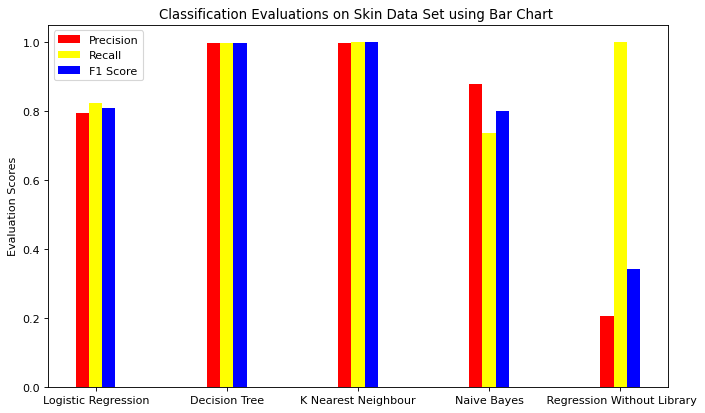

In [180]:
# Skin Data Set Evaluation Bar Chart
N = 5
ind = np.arange(N)
width = 0.1

avals = []
avals.append(lr_precision_mean)
avals.append(dtc_precision_mean)
avals.append(knn_precision_mean)
avals.append(nb_precision_mean)
avals.append(lr_alg_precision_mean)

bar1 = plt.bar(ind, avals, width, color = 'r')

bvals = []
bvals.append(lr_recall_mean)
bvals.append(dtc_recall_mean)
bvals.append(knn_recall_mean)
bvals.append(nb_recall_mean)
bvals.append(lr_alg_recall_mean)


bar2 = plt.bar(ind+width, bvals, width, color='yellow')

cvals = []
cvals.append(lr_f1score_mean)
cvals.append(dtc_f1score_mean)
cvals.append(knn_f1score_mean)
cvals.append(nb_f1score_mean)
cvals.append(lr_alg_f1score_mean)



bar3 = plt.bar(ind+width*2, cvals, width, color = 'b')



# plt.xlabel("Algorithms")
plt.ylabel('Evaluation Scores')
plt.title("Classification Evaluations on Skin Data Set using Bar Chart ")

plt.xticks(ind+width,['Logistic Regression', 'Decision Tree', 'K Nearest Neighbour',
                      'Naive Bayes',' Regression Without Library'])
plt.legend((bar1, bar2, bar3), ('Precision', 'Recall', 'F1 Score') )
plt.rcParams.update({'figure.figsize':(10,6), 'figure.dpi':80})
plt.show()


In [183]:
print(dtc_precision_mean)
print(dtc_recall_mean)
print(dtc_f1score_mean)


0.9977998415476769
0.9986236283654888
0.9982114469164621


In [184]:
print(knn_precision_mean)
print(knn_recall_mean)
print(knn_f1score_mean)


0.9978023478160484
0.9998426996666094
0.9988214592455253
